In [194]:
import warnings
warnings.simplefilter(action="ignore")
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact 
import hvplot.pandas
import panel as pn
import os
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

!echo %cd%

C:\Users\Squid Ink Tony\Jupyter-Workspace


In [195]:
from dotenv import load_dotenv
load_dotenv()

True

In [196]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api1 = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

## Monte Carlo Simulations

In [197]:
#Initial simulations setup
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes 5 years ago to Feb 15, 2020
pre_start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
pre_end_date = pd.Timestamp("2020-02-15", tz="America/New_York").isoformat()

post_start_date = pd.Timestamp("2020-02-16", tz="America/New_York").isoformat()
post_end_date = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()

# Set the ticker information
comm_ticker = ["CORN", "WEAT", "SOYB"]
metal_ticker = ["GLD", "SLV", "PLTM"]
stock_ticker = ["AAPL", "AMZN", "LUV", "PFE"]
sp500_ticker = ["SPY"]
crypto_ticker = ["BTC", "ETH", "LTC"]

### Pre-COVID Commodities

In [198]:
# Get 5 year's worth of historical price data for Corn, Wheat, and Soybean
pre_comm_df_ticker = api1.get_barset(
    comm_ticker,
    timeframe,
    start=pre_start_date,
    end=pre_end_date
).df

# Display sample data
pre_comm_df_ticker.head()

CORN                                     SOYB  \
                            open   high      low    close  volume    open   
2015-01-02 00:00:00-05:00  26.63  26.71  26.2400  26.4999  121630  20.680   
2015-01-05 00:00:00-05:00  26.85  27.16  26.8500  27.1400  110819  20.650   
2015-01-06 00:00:00-05:00  27.20  27.32  26.8900  27.0700  150495  21.475   
2015-01-07 00:00:00-05:00  27.01  27.05  26.5000  26.5000  107652  21.340   
2015-01-08 00:00:00-05:00  26.50  26.56  26.3001  26.3800   80838  21.410   

                                                              WEAT           \
                              high      low    close volume   open     high   
2015-01-02 00:00:00-05:00  20.6800  20.4500  20.4500  21816  12.74  12.7400   
2015-01-05 00:00:00-05:00  21.2199  20.6500  21.1700  11707  12.72  12.8129   
2015-01-06 00:00:00-05:00  21.4750  21.1800  21.3700  13875  12.75  12.9400   
2015-01-07 00:00:00-05:00  21.4200  21.2328  21.3000  10406  12.73  12.7300   
2015-01-08 00:00:00-05:00  21.4100  21.1101  21.1401  10915  12.40  12.4200   

                                                    
                               low    close volume  
2015-01-02 00:00:00-05:00  12.4000  12.5500  76805  
2015-01-05 00:00:00-05:00  12.6200  12.6500  53508  
2015-01-06 00:00:00-05:00  12.6001  12.7300  38423  
2015-01-07 00:00:00-05:00  12.4700  12.4761  12694  
2015-01-08 00:00:00-05:00  12.2300  12.2300  77050

In [199]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
pre_comm_fiveyear = MCSimulation(
    portfolio_data = pre_comm_df_ticker,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [200]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
pre_comm_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991590,1.002144,0.994942,1.014841,1.001465,1.005494,0.997799,1.001868,0.999802,0.998622,...,1.016901,0.997088,1.006069,0.991069,0.998223,1.008478,1.000836,0.992284,0.997529,0.991068
2,0.987906,1.002438,1.001117,1.014142,0.995445,1.009764,0.987128,0.991908,0.992240,0.997704,...,1.026776,0.998758,1.006955,0.983879,0.999428,1.001455,1.000553,0.989407,1.000802,0.987434
3,0.986857,1.007158,1.005018,1.018237,0.998922,1.003415,0.985934,0.983462,0.991041,1.008785,...,1.032454,0.988140,1.005670,0.975075,1.012210,1.002364,0.991656,0.991776,1.006663,0.989603
4,1.001255,1.004013,1.005807,1.020158,1.000992,0.996459,0.970193,0.983379,0.988817,1.014212,...,1.037708,0.996849,1.006605,0.982667,1.007739,0.998527,0.989171,0.989225,0.996307,0.991148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.394825,0.546547,0.580206,0.739696,0.957974,0.592195,0.605083,0.498492,0.804196,0.489132,...,0.543031,0.473210,0.824558,0.528346,0.550021,0.427812,0.384271,0.561144,0.946761,0.636855
1257,0.394442,0.549547,0.580049,0.742799,0.955371,0.591213,0.605364,0.499033,0.802493,0.484730,...,0.542205,0.476107,0.819676,0.529393,0.553515,0.425573,0.384543,0.560424,0.951382,0.634499
1258,0.390169,0.548960,0.576222,0.745759,0.956272,0.595749,0.598698,0.501821,0.802362,0.484824,...,0.539630,0.474589,0.825849,0.528004,0.551936,0.427083,0.386783,0.558722,0.945627,0.636125
1259,0.388438,0.544672,0.572503,0.741841,0.951487,0.602689,0.591793,0.505229,0.803604,0.484960,...,0.535714,0.470763,0.829042,0.532873,0.546914,0.425141,0.387954,0.554973,0.950641,0.639835


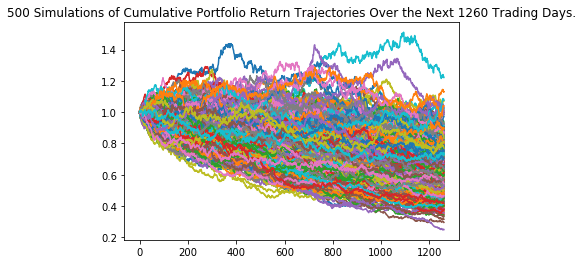

In [201]:
# Plot simulation outcomes
pre_comm_line_plot = pre_comm_fiveyear.plot_simulation()

# Save the plot for future usage
pre_comm_line_plot.get_figure().savefig("Comm_fiveyear_sim_plot.png", bbox_inches="tight")

In [202]:
# Compute summary statistics from the simulated daily returns
pre_comm_simulated_returns_data = {
    "mean": list(pre_comm_fiveyear.simulated_return.mean(axis=1)),
    "median": list(pre_comm_fiveyear.simulated_return.median(axis=1)),
    "min": list(pre_comm_fiveyear.simulated_return.min(axis=1)),
    "max": list(pre_comm_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
pre_comm_df_simulated_returns = pd.DataFrame(pre_comm_simulated_returns_data)

# Display sample data
pre_comm_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999862,0.999765,0.970786,1.019950
2,0.999556,0.999680,0.972070,1.027314
3,0.999175,0.999045,0.956105,1.032454
4,0.999226,0.998816,0.963983,1.047102


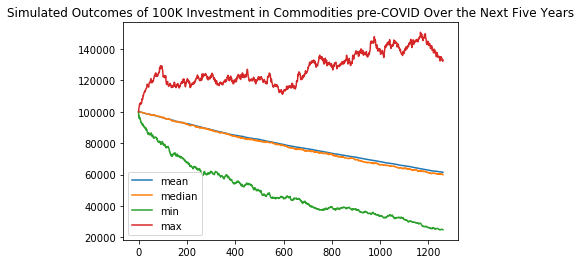

In [203]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
pre_comm_cumulative_pnl = initial_investment * pre_comm_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
pre_comm_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Commodities pre-COVID Over the Next Five Years")

In [204]:
# Fetch summary statistics from the Monte Carlo simulation results
pre_comm_tbl = pre_comm_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(pre_comm_tbl)

count           500.000000
mean              0.614553
std               0.148666
min               0.248994
25%               0.510424
50%               0.598938
75%               0.694548
max               1.324472
95% CI Lower      0.364785
95% CI Upper      0.939639
Name: 1260, dtype: float64


In [205]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
pre_comm_ci_lower = round(pre_comm_tbl[8]*100000,2)
pre_comm_ci_upper = round(pre_comm_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an pre-COVID initial investment of $100,000 in commodities"
      f" over the next 5 years will end within in the range of"
      f" ${pre_comm_ci_lower} and ${pre_comm_ci_upper}")

There is a 95% chance that an pre-COVID initial investment of $100,000 in commodities over the next 5 years will end within in the range of $36478.49 and $93963.88


### Post-COVID Commodities

In [206]:
# Get 8 month's worth of historical price data for Corn, Wheat, and Soybean
post_comm_df_ticker = api1.get_barset(
    comm_ticker,
    timeframe,
    start=post_start_date,
    end=post_end_date
).df

# Display sample data
post_comm_df_ticker.head()

CORN                                   SOYB  \
                            open    high     low   close  volume   open   
2020-02-18 00:00:00-05:00  14.33  14.450  14.330  14.410   97163  14.83   
2020-02-19 00:00:00-05:00  14.44  14.440  14.320  14.385   90637  14.75   
2020-02-20 00:00:00-05:00  14.32  14.350  14.270  14.270  124500  14.77   
2020-02-21 00:00:00-05:00  14.29  14.330  14.191  14.191   70197  14.76   
2020-02-24 00:00:00-05:00  14.06  14.084  13.952  14.040   85165  14.57   

                                                             WEAT        \
                             high      low    close  volume  open  high   
2020-02-18 00:00:00-05:00  14.830  14.7700  14.7700   15411  5.80  5.87   
2020-02-19 00:00:00-05:00  14.820  14.6897  14.7902   38487  5.80  5.83   
2020-02-20 00:00:00-05:00  14.820  14.7500  14.7600   75271  5.82  5.82   
2020-02-21 00:00:00-05:00  14.871  14.7000  14.7000   26606  5.82  5.88   
2020-02-24 00:00:00-05:00  14.570  14.4400  14.4900  109533  5.64  5.64   

                                                   
                             low  close    volume  
2020-02-18 00:00:00-05:00  5.700  5.840  565847.0  
2020-02-19 00:00:00-05:00  5.710  5.830  211181.0  
2020-02-20 00:00:00-05:00  5.770  5.795   57614.0  
2020-02-21 00:00:00-05:00  5.725  5.740  302186.0  
2020-02-24 00:00:00-05:00  5.540  5.570  236396.0

In [207]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
post_comm_fiveyear = MCSimulation(
    portfolio_data = post_comm_df_ticker,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [209]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
post_comm_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992727,1.001537,1.006821,1.015255,0.999813,0.997933,1.002375,1.007653,1.003321,1.000915,...,0.988697,0.988918,0.997492,1.001616,0.995383,0.996022,0.993809,1.000714,1.002546,1.006173
2,0.995058,0.994647,0.996920,1.016890,0.994441,0.995658,1.016548,1.012359,1.008073,1.000527,...,0.979373,0.992489,0.998678,1.010832,1.001969,0.998624,0.998226,0.999119,1.012973,0.998691
3,1.006788,0.996299,0.978797,1.030449,0.992577,0.997819,1.012957,1.007310,1.015980,0.994714,...,0.973783,0.984603,0.995933,1.020262,1.004235,0.991019,1.001913,0.998938,1.002187,1.003480
4,0.998761,0.996430,0.989279,1.013823,0.987911,0.981865,1.002501,1.001509,1.020268,0.988053,...,0.975323,0.999687,0.995051,1.016858,0.995892,0.990858,1.007265,0.996914,1.005650,0.996882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.030571,1.024230,1.089232,0.743120,1.224378,0.645734,0.809579,1.149577,0.756374,0.924333,...,0.962248,0.867589,1.907907,0.750106,0.823750,1.084642,1.098629,1.126507,1.018034,1.223522
1257,1.014158,1.020769,1.100155,0.749711,1.219167,0.648284,0.803320,1.152232,0.752095,0.920775,...,0.963787,0.870108,1.916095,0.760341,0.827387,1.075509,1.095553,1.139343,1.017068,1.228047
1258,1.025299,1.023541,1.111055,0.745521,1.231483,0.650879,0.805106,1.153243,0.756064,0.913047,...,0.971954,0.863272,1.945939,0.766250,0.818283,1.079967,1.088953,1.148451,1.015801,1.228323
1259,1.032250,1.022317,1.104113,0.744695,1.223808,0.655559,0.808743,1.155990,0.764107,0.916669,...,0.973151,0.869165,1.943532,0.765398,0.821535,1.077313,1.090605,1.154845,1.007245,1.232596


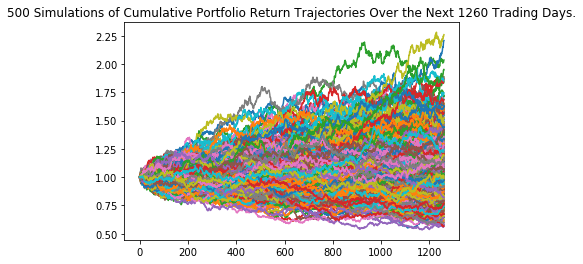

In [210]:
# Plot simulation outcomes
post_comm_line_plot = post_comm_fiveyear.plot_simulation()

# Save the plot for future usage
post_comm_line_plot.get_figure().savefig("Comm_fiveyear_sim_plot.png", bbox_inches="tight")

In [211]:
# Compute summary statistics from the simulated daily returns
post_comm_simulated_returns_data = {
    "mean": list(post_comm_fiveyear.simulated_return.mean(axis=1)),
    "median": list(post_comm_fiveyear.simulated_return.median(axis=1)),
    "min": list(post_comm_fiveyear.simulated_return.min(axis=1)),
    "max": list(post_comm_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
post_comm_df_simulated_returns = pd.DataFrame(post_comm_simulated_returns_data)

# Display sample data
post_comm_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999923,0.999566,0.978946,1.020800
2,0.999696,0.999302,0.971097,1.033664
3,1.000277,0.999897,0.966579,1.048782
4,0.999890,0.998801,0.952654,1.049880


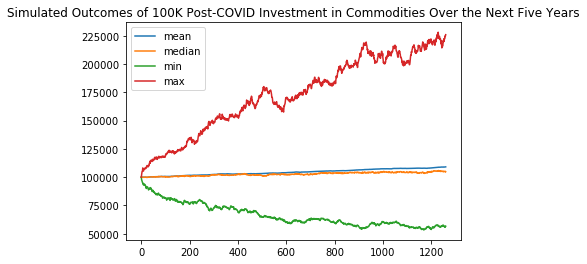

In [212]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
post_comm_cumulative_pnl = initial_investment * post_comm_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
post_comm_cumulative_pnl.plot(title="Simulated Outcomes of 100K Post-COVID Investment in Commodities Over the Next Five Years")

In [213]:
# Fetch summary statistics from the Monte Carlo simulation results
post_comm_tbl = post_comm_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(post_comm_tbl)

count           500.000000
mean              1.090856
std               0.275439
min               0.566878
25%               0.897047
50%               1.048189
75%               1.253889
max               2.259363
95% CI Lower      0.650727
95% CI Upper      1.699487
Name: 1260, dtype: float64


In [214]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
post_comm_ci_lower = round(post_comm_tbl[8]*100000,2)
post_comm_ci_upper = round(post_comm_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an post-COVID initial investment of $100,000 in commodities"
      f" over the next 5 years will end within in the range of"
      f" ${post_comm_ci_lower} and ${post_comm_ci_upper}")

There is a 95% chance that an post-COVID initial investment of $100,000 in commodities over the next 5 years will end within in the range of $65072.74 and $169948.66


### Pre-COVID Precious Metals

In [215]:
# Get 5 year's worth of historical price data for Gold, Platinum, and Silver
pre_metal_df_ticker = api1.get_barset(
    metal_ticker,
    timeframe,
    start=pre_start_date,
    end=pre_end_date
).df

# Display sample data
pre_metal_df_ticker.head()

GLD                                        PLTM  \
                             open    high     low    close    volume     open   
2015-01-02 00:00:00-05:00  112.46  114.80  112.32  114.070   6479924   9.9100   
2015-01-05 00:00:00-05:00  114.78  116.00  114.73  115.850   6243447   9.9600   
2015-01-06 00:00:00-05:00  116.22  117.50  115.80  117.099  10645235   9.9400   
2015-01-07 00:00:00-05:00  116.47  116.88  116.17  116.430   5796027  10.0000   
2015-01-08 00:00:00-05:00  116.45  116.87  115.85  115.950   6085372  10.1822   

                                                                 SLV         \
                              high      low    close   volume   open   high   
2015-01-02 00:00:00-05:00   9.9599   9.8300   9.9400  42818.0  14.96  15.39   
2015-01-05 00:00:00-05:00   9.9600   9.8000   9.8100   6146.0  15.34  15.57   
2015-01-06 00:00:00-05:00   9.9500   9.8400   9.9100   9534.0  15.59  16.01   
2015-01-07 00:00:00-05:00  10.0780   9.9950  10.0499   2100.0  15.70  15.95   
2015-01-08 00:00:00-05:00  10.2700  10.1822  10.2087   1232.0  15.84  15.95   

                                                  
                             low  close   volume  
2015-01-02 00:00:00-05:00  14.89  15.11  8427828  
2015-01-05 00:00:00-05:00  15.23  15.53  8628025  
2015-01-06 00:00:00-05:00  15.54  15.83  9064371  
2015-01-07 00:00:00-05:00  15.68  15.84  5522889  
2015-01-08 00:00:00-05:00  15.61  15.63  4591286

In [216]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
pre_metal_fiveyear = MCSimulation(
    portfolio_data = pre_metal_df_ticker,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [217]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
pre_metal_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,8.207886e-01,7.150844e-01,0.964412,1.219091e+00,8.730112e-01,8.669913e-01,1.279296e+00,0.979060,1.248427e+00,1.038649,...,1.029891e+00,1.074230e+00,0.709608,1.235148e+00,9.644093e-01,9.841332e-01,1.273302e+00,1.014033e+00,9.209150e-01,8.625438e-01
2,9.938073e-01,8.487852e-01,0.743065,8.063782e-01,1.065297e+00,8.460321e-01,1.369876e+00,0.620518,9.204531e-01,1.075845,...,9.496005e-01,9.599047e-01,0.767496,1.194288e+00,1.295647e+00,8.233532e-01,1.545883e+00,8.539090e-01,9.011299e-01,7.023339e-01
3,1.062518e+00,7.217110e-01,0.771385,1.048613e+00,1.116487e+00,8.068732e-01,1.298646e+00,0.682196,9.330575e-01,1.012159,...,6.278450e-01,8.781236e-01,0.703728,8.654630e-01,8.542532e-01,9.151148e-01,1.588508e+00,7.253020e-01,8.333846e-01,4.294609e-01
4,6.700499e-01,9.035356e-01,0.598485,9.529668e-01,1.181508e+00,7.958111e-01,1.160337e+00,0.754912,1.335302e+00,1.063746,...,8.587192e-01,7.760798e-01,0.818887,9.725247e-01,8.863632e-01,9.611888e-01,1.918852e+00,6.436736e-01,8.716688e-01,4.337526e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.131943e-11,5.904372e-09,0.000040,2.077046e-11,1.052070e-10,6.695039e-07,5.581715e-14,0.000002,1.837985e-16,0.000002,...,5.482473e-10,3.658373e-08,0.000004,4.205757e-10,5.327975e-07,8.550203e-13,4.860056e-10,2.315683e-12,2.058089e-08,5.753875e-10
1257,4.969526e-11,3.718379e-09,0.000032,2.500450e-11,8.707601e-11,5.945338e-07,7.570306e-14,0.000002,2.259136e-16,0.000002,...,6.090176e-10,3.221057e-08,0.000005,4.048648e-10,4.849332e-07,6.828948e-13,5.857979e-10,1.759188e-12,1.946293e-08,6.556512e-10
1258,7.556923e-11,4.877595e-09,0.000036,1.685210e-11,1.042109e-10,5.227262e-07,8.337313e-14,0.000002,2.074860e-16,0.000002,...,6.553711e-10,3.337537e-08,0.000006,4.063307e-10,5.282180e-07,9.960635e-13,6.678700e-10,2.408698e-12,2.391631e-08,7.020377e-10
1259,9.416155e-11,4.641810e-09,0.000044,8.495157e-12,1.380014e-10,5.378135e-07,3.086945e-14,0.000002,2.235369e-16,0.000001,...,8.819249e-10,3.372259e-08,0.000006,4.032290e-10,5.272294e-07,7.736947e-13,8.188715e-10,2.429388e-12,2.010794e-08,7.270662e-10


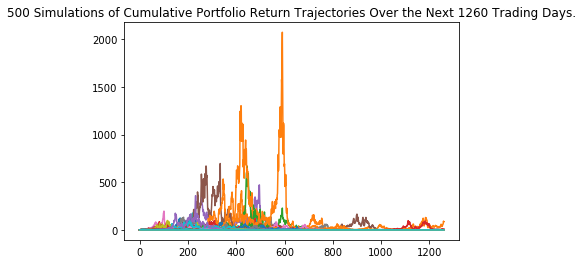

In [219]:
# Plot simulation outcomes
pre_metal_line_plot = pre_metal_fiveyear.plot_simulation()

# Save the plot for future usage
pre_metal_line_plot.get_figure().savefig("Metal_fiveyear_sim_plot.png", bbox_inches="tight")

In [220]:
# Compute summary statistics from the simulated daily returns
pre_metal_simulated_returns_data = {
    "mean": list(pre_metal_fiveyear.simulated_return.mean(axis=1)),
    "median": list(pre_metal_fiveyear.simulated_return.median(axis=1)),
    "min": list(pre_metal_fiveyear.simulated_return.min(axis=1)),
    "max": list(pre_metal_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
pre_metal_df_simulated_returns = pd.DataFrame(pre_metal_simulated_returns_data)

# Display sample data
pre_metal_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.986422,0.983653,0.352865,1.654172
2,0.990719,0.970967,0.304054,2.210589
3,1.015547,0.961821,0.323953,2.644028
4,1.007737,0.957741,0.176244,2.921036


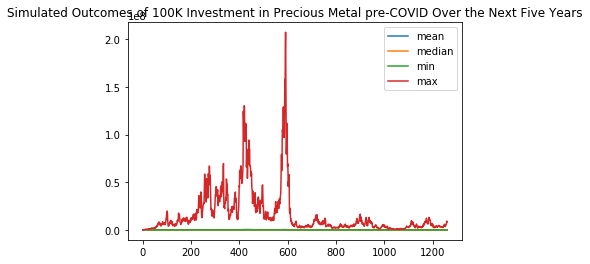

In [222]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
pre_metal_cumulative_pnl = initial_investment * pre_metal_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
pre_metal_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Precious Metal pre-COVID Over the Next Five Years")

In [223]:
# Fetch summary statistics from the Monte Carlo simulation results
pre_metal_tbl = pre_metal_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(pre_metal_tbl)

count           5.000000e+02
mean            2.012505e-01
std             3.913771e+00
min             3.676693e-18
25%             5.893396e-11
50%             1.110894e-08
75%             1.740600e-06
max             8.694614e+01
95% CI Lower    1.511270e-15
95% CI Upper    2.452104e-02
Name: 1260, dtype: float64


In [224]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
pre_metal_ci_lower = round(pre_metal_tbl[8]*100000,2)
pre_metal_ci_upper = round(pre_metal_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an pre-COVID initial investment of $100,000 in metals"
      f" over the next 5 years will end within in the range of"
      f" ${pre_metal_ci_lower} and ${pre_metal_ci_upper}")

There is a 95% chance that an pre-COVID initial investment of $100,000 in commodities over the next 5 years will end within in the range of $0.0 and $2452.1


### Post-COVID Precious Metals

In [225]:
# Get 8 month's worth of historical price data for Gold, Platinum, and Silver
post_metal_df_ticker = api1.get_barset(
    metal_ticker,
    timeframe,
    start=post_start_date,
    end=post_end_date
).df

# Display sample data
post_metal_df_ticker.head()

GLD                                        PLTM  \
                             open      high      low   close    volume   open   
2020-02-18 00:00:00-05:00  149.88  151.0900  149.470  150.88  10204151   9.64   
2020-02-19 00:00:00-05:00  151.00  151.8200  150.815  151.82   7790138  10.00   
2020-02-20 00:00:00-05:00  152.00  152.8300  151.950  152.43   7699117   9.85   
2020-02-21 00:00:00-05:00  154.43  155.2219  154.180  154.67  15327704   9.70   
2020-02-24 00:00:00-05:00  158.50  158.5300  155.360  156.15  23734795   9.62   

                                                             SLV         \
                              high     low   close volume   open   high   
2020-02-18 00:00:00-05:00   9.8499  9.6400  9.8300  55520  16.78  17.02   
2020-02-19 00:00:00-05:00  10.0000  9.9000  9.9908  28707  17.04  17.24   
2020-02-20 00:00:00-05:00   9.8500  9.6500  9.7000  48664  17.09  17.20   
2020-02-21 00:00:00-05:00   9.7480  9.6348  9.6900  19076  17.27  17.41   
2020-02-24 00:00:00-05:00   9.6600  9.5100  9.6093  28727  17.56  17.69   

                                                   
                             low  close    volume  
2020-02-18 00:00:00-05:00  16.73  17.01  17549922  
2020-02-19 00:00:00-05:00  16.99  17.24  15562099  
2020-02-20 00:00:00-05:00  17.07  17.15  12552236  
2020-02-21 00:00:00-05:00  17.24  17.28  17102155  
2020-02-24 00:00:00-05:00  17.30  17.40  27801097

In [226]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
post_metal_fiveyear = MCSimulation(
    portfolio_data = post_metal_df_ticker,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [227]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
post_metal_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982195,0.998375,1.000341,1.000551,1.014307,0.992679,0.980196,0.984983,1.000246,0.999756,...,1.017904,1.014703,0.999341,1.007566,0.987248,0.994062,1.018667,1.034024,1.004121,1.025462
2,0.977704,0.991718,1.001500,0.982399,1.026938,0.990427,0.970366,1.004613,0.996395,1.033768,...,1.028766,1.001317,1.010017,1.015723,0.984733,1.006209,1.015483,1.019369,1.007523,1.038351
3,0.980595,0.951474,1.021415,0.974806,1.031806,0.999840,0.949808,1.017992,0.998984,1.038467,...,1.049312,1.031636,1.024027,1.008222,0.977202,0.994593,1.017103,1.037353,0.993106,1.025211
4,0.989393,0.965918,1.042854,0.985698,1.040448,1.007554,0.983334,1.030302,1.025336,1.051910,...,1.068966,1.066029,1.048150,1.012537,0.989245,0.994285,1.002484,1.049711,0.978426,1.029736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.910314,2.291924,2.167668,3.158796,2.636672,5.542108,1.241508,3.927799,9.877558,1.764306,...,2.373632,2.744222,1.688266,2.480502,2.719549,3.120796,1.448128,3.448946,3.520492,1.208497
1257,1.925264,2.267443,2.179434,3.160641,2.621335,5.426154,1.260859,3.893050,9.578512,1.747597,...,2.338330,2.755226,1.695225,2.542209,2.767873,3.080431,1.455201,3.438607,3.635016,1.240003
1258,1.868197,2.279729,2.180086,3.190423,2.636109,5.333853,1.304181,3.970509,9.596472,1.769776,...,2.360747,2.719794,1.686445,2.523443,2.789803,3.028258,1.445119,3.423292,3.604314,1.253935
1259,1.889901,2.290866,2.230191,3.159976,2.631862,5.362528,1.316200,4.035396,9.690574,1.740746,...,2.323317,2.647109,1.697777,2.584524,2.842521,3.075529,1.474583,3.417725,3.646722,1.218557


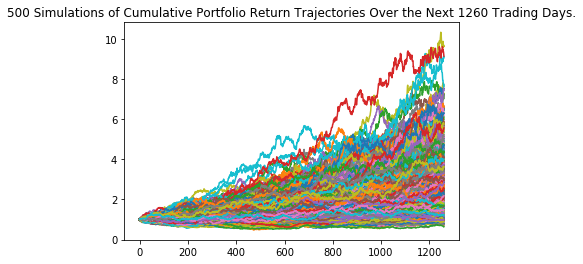

In [228]:
# Plot simulation outcomes
post_metal_line_plot = post_metal_fiveyear.plot_simulation()

# Save the plot for future usage
post_metal_line_plot.get_figure().savefig("Metal_fiveyear_sim_plot.png", bbox_inches="tight")

In [229]:
# Compute summary statistics from the simulated daily returns
post_metal_simulated_returns_data = {
    "mean": list(post_metal_fiveyear.simulated_return.mean(axis=1)),
    "median": list(post_metal_fiveyear.simulated_return.median(axis=1)),
    "min": list(post_metal_fiveyear.simulated_return.min(axis=1)),
    "max": list(post_metal_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
post_metal_df_simulated_returns = pd.DataFrame(post_metal_simulated_returns_data)

# Display sample data
post_metal_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999890,0.999728,0.956642,1.042705
2,1.000738,1.001490,0.940693,1.061877
3,1.001735,1.002416,0.927277,1.063850
4,1.003121,1.003598,0.924343,1.081649


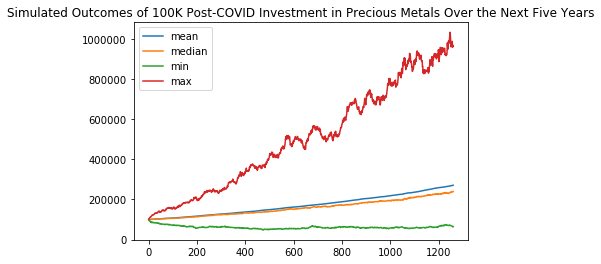

In [230]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
post_metal_cumulative_pnl = initial_investment * post_metal_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
post_metal_cumulative_pnl.plot(title="Simulated Outcomes of 100K Post-COVID Investment in Precious Metals Over the Next Five Years")

In [232]:
# Fetch summary statistics from the Monte Carlo simulation results
post_metal_tbl = post_metal_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(post_metal_tbl)

count           500.000000
mean              2.707777
std               1.458508
min               0.641989
25%               1.677359
50%               2.397969
75%               3.293430
max               9.626737
95% CI Lower      0.896925
95% CI Upper      6.582764
Name: 1260, dtype: float64


In [235]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
post_metal_ci_lower = round(post_metal_tbl[8]*100000,2)
post_metal_ci_upper = round(post_metal_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an post-COVID initial investment of $100,000 in metals"
      f" over the next 5 years will end within in the range of"
      f" ${post_metal_ci_lower} and ${post_metal_ci_upper}")

There is a 95% chance that an post-COVID initial investment of $100,000 in commodities over the next 5 years will end within in the range of $89692.53 and $658276.44


### Pre-COVID Stock Portfolio

In [236]:
# Get 5 year's worth of historical price data for Apple, Amazon, Southwest, Pfizer
pre_stock_df_ticker = api1.get_barset(
    stock_ticker,
    timeframe,
    start=pre_start_date,
    end=pre_end_date
).df

# Display sample data
pre_stock_df_ticker.head()

AAPL                                       AMZN  \
                             open    high      low   close    volume    open   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497  312.58   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623  307.01   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540  302.24   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408  297.50   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019  300.32   

                                                                LUV         \
                             high       low   close   volume   open   high   
2015-01-02 00:00:00-05:00  314.75  306.9601  308.52  2238563  42.69  43.05   
2015-01-05 00:00:00-05:00  308.38  300.8500  302.10  2073212  42.83  42.90   
2015-01-06 00:00:00-05:00  303.00  292.3800  295.29  2822127  41.90  42.05   
2015-01-07 00:00:00-05:00  301.28  295.3300  298.42  2058550  40.77  41.12   
2015-01-08 00:00:00-05:00  303.14  296.1100  300.46  2409066  41.00  42.09   

                                                     PFE                       \
                             low   close   volume   open   high    low  close   
2015-01-02 00:00:00-05:00  42.20  42.680  6108290  31.27  31.78  31.22  31.33   
2015-01-05 00:00:00-05:00  41.45  41.655  6557685  31.35  31.41  31.01  31.19   
2015-01-06 00:00:00-05:00  39.67  40.470  9442530  31.27  31.86  31.12  31.45   
2015-01-07 00:00:00-05:00  40.38  40.800  6926002  31.71  31.87  31.58  31.85   
2015-01-08 00:00:00-05:00  40.95  41.840  5916154  32.34  32.64  32.22  32.52   

                                     
                             volume  
2015-01-02 00:00:00-05:00  12666717  
2015-01-05 00:00:00-05:00  18595001  
2015-01-06 00:00:00-05:00  25471105  
2015-01-07 00:00:00-05:00  17183364  
2015-01-08 00:00:00-05:00  38186000

In [237]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
pre_stock_fiveyear = MCSimulation(
    portfolio_data = pre_stock_df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [238]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
pre_stock_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002475,0.998694,1.005236,1.003271,0.998331,1.007161,0.998765,0.989172,1.002689,0.993584,...,0.987585,1.001138,1.005177,1.009796,1.003030,1.007338,0.988083,1.006651,0.989485,1.001070
2,0.991120,1.008216,1.010225,1.001997,0.993439,1.018317,0.990548,0.990344,0.992270,0.998419,...,0.992763,1.013175,1.017797,1.019938,1.002087,1.001382,0.997380,1.009536,0.988548,1.009563
3,1.001227,1.007705,1.005093,0.997161,0.998198,1.017947,0.986314,0.987897,1.003597,0.988984,...,0.983735,1.030982,1.013436,1.028294,1.002217,0.991757,0.990010,1.013989,0.995881,1.023068
4,1.001833,1.011778,1.008044,0.979474,0.991832,1.020601,0.994469,0.991924,1.002966,0.992269,...,0.995702,1.034723,1.015714,1.036369,1.021824,0.995669,1.000369,1.016102,0.989899,1.027341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.597763,3.883501,3.277689,2.782864,2.360628,2.962417,1.664549,3.047337,2.158215,1.917728,...,2.698448,2.340898,2.453350,2.039141,3.616851,1.756143,2.876069,1.925360,3.275309,4.023722
1257,2.592723,3.877447,3.297400,2.744074,2.382624,2.945722,1.688286,3.014177,2.146461,1.907263,...,2.686079,2.324066,2.445532,2.062524,3.613487,1.743361,2.859046,1.931232,3.302782,3.990824
1258,2.618203,3.874911,3.211730,2.786768,2.384504,2.923508,1.684964,3.025110,2.155884,1.903940,...,2.668595,2.331863,2.448042,2.048436,3.602641,1.744563,2.849937,1.920511,3.280700,4.041482
1259,2.596885,3.851251,3.192107,2.824383,2.410590,2.941599,1.674544,3.028692,2.181006,1.918618,...,2.692570,2.356585,2.423900,2.033263,3.612781,1.759718,2.875749,1.936984,3.316161,4.027462


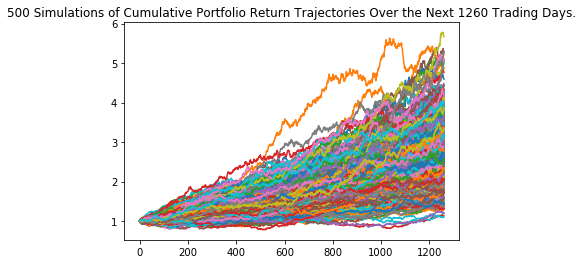

In [239]:
# Plot simulation outcomes
pre_stock_line_plot = pre_stock_fiveyear.plot_simulation()

# Save the plot for future usage
pre_stock_line_plot.get_figure().savefig("Stock_fiveyear_sim_plot.png", bbox_inches="tight")

In [240]:
# Compute summary statistics from the simulated daily returns
pre_stock_simulated_returns_data = {
    "mean": list(pre_stock_fiveyear.simulated_return.mean(axis=1)),
    "median": list(pre_stock_fiveyear.simulated_return.median(axis=1)),
    "min": list(pre_stock_fiveyear.simulated_return.min(axis=1)),
    "max": list(pre_stock_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
pre_stock_df_simulated_returns = pd.DataFrame(pre_stock_simulated_returns_data)

# Display sample data
pre_stock_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000326,1.000182,0.972789,1.024385
2,1.000951,1.000922,0.964165,1.030337
3,1.001463,1.001164,0.955367,1.047359
4,1.002260,1.001526,0.950003,1.045832


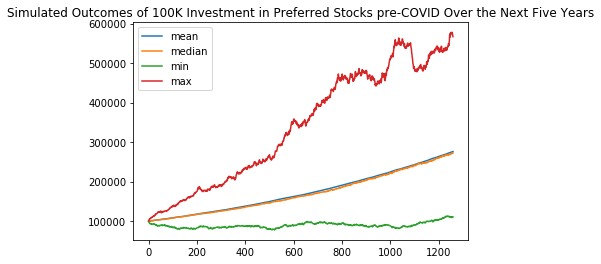

In [241]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
pre_stock_cumulative_pnl = initial_investment * pre_stock_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
pre_stock_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Preferred Stocks pre-COVID Over the Next Five Years")

In [242]:
# Fetch summary statistics from the Monte Carlo simulation results
pre_stock_tbl = pre_stock_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(pre_stock_tbl)

count           500.000000
mean              2.759344
std               0.786105
min               1.105595
25%               2.182427
50%               2.720864
75%               3.225915
max               5.667378
95% CI Lower      1.402129
95% CI Upper      4.375733
Name: 1260, dtype: float64


In [243]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
pre_stock_ci_lower = round(pre_stock_tbl[8]*100000,2)
pre_stock_ci_upper = round(pre_stock_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an pre-COVID initial investment of $100,000 in stocks"
      f" over the next 5 years will end within in the range of"
      f" ${pre_stock_ci_lower} and ${pre_stock_ci_upper}")

There is a 95% chance that an pre-COVID initial investment of $100,000 in commodities over the next 5 years will end within in the range of $140212.92 and $437573.29


### Post-COVID Preferred Stocks

In [244]:
# Get 8 month's worth of historical price data for Corn, Wheat, and Soybean
post_stock_df_ticker = api1.get_barset(
    stock_ticker,
    timeframe,
    start=post_start_date,
    end=post_end_date
).df

# Display sample data
post_stock_df_ticker.head()

AAPL                                       AMZN  \
                             open    high     low   close    volume     open   
2020-02-18 00:00:00-05:00  315.36  319.75  314.61  319.00  34217504  2127.98   
2020-02-19 00:00:00-05:00  320.00  324.57  320.00  323.62  19967302  2167.80   
2020-02-20 00:00:00-05:00  322.55  324.65  318.21  320.30  22475725  2172.67   
2020-02-21 00:00:00-05:00  318.62  320.45  310.50  313.03  29434253  2141.00   
2020-02-24 00:00:00-05:00  297.26  304.18  289.23  298.17  49427633  2003.18   

                                                                    LUV  \
                               high        low    close   volume   open   
2020-02-18 00:00:00-05:00  2166.070  2124.1050  2155.67  2674865  58.00   
2020-02-19 00:00:00-05:00  2185.100  2161.1200  2170.21  2264530  57.68   
2020-02-20 00:00:00-05:00  2176.790  2127.4500  2153.59  2869600  57.02   
2020-02-21 00:00:00-05:00  2143.540  2088.0000  2095.97  4342141  56.53   
2020-02-24 00:00:00-05:00  2039.295  1987.9742  2008.74  6047539  54.87   

                                                             PFE          \
                            high      low  close   volume   open    high   
2020-02-18 00:00:00-05:00  58.34  57.3800  57.60  1912562  36.55  36.670   
2020-02-19 00:00:00-05:00  57.74  57.0700  57.08  1653105  36.40  36.500   
2020-02-20 00:00:00-05:00  57.51  56.7100  56.92  2110047  35.71  36.060   
2020-02-21 00:00:00-05:00  56.72  55.4600  56.52  1698562  35.76  35.820   
2020-02-24 00:00:00-05:00  54.99  53.3529  54.11  5992300  35.04  35.395   

                                                       
                               low    close    volume  
2020-02-18 00:00:00-05:00  36.2676  36.3100  13852437  
2020-02-19 00:00:00-05:00  36.2100  36.2354  13880497  
2020-02-20 00:00:00-05:00  35.4100  35.8400  33930157  
2020-02-21 00:00:00-05:00  35.5300  35.7200  27503962  
2020-02-24 00:00:00-05:00  34.6000  34.6800  27975406

In [247]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
post_stock_fiveyear = MCSimulation(
    portfolio_data = post_stock_df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [248]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
post_stock_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020900,0.990895,0.997032,0.997416,1.024679,1.003368,0.983010,0.992858,1.017256,1.005866,...,0.989004,1.001950,1.010601,0.989047,0.992354,0.977771,0.991673,1.003978,0.950651,1.014408
2,1.014103,0.987335,1.041703,0.985466,1.028431,0.979619,0.975838,1.019886,1.018055,0.983106,...,1.002357,1.011253,1.033398,0.991539,1.008755,0.963132,0.986474,0.988841,0.988069,1.017236
3,1.029241,1.000308,1.052334,1.017354,1.046410,0.990072,0.999309,1.036018,1.019955,0.988972,...,0.992849,1.023179,1.034859,0.982582,1.042706,0.966386,1.024159,0.996120,0.998147,1.025040
4,0.986381,1.024949,1.062828,0.995283,1.049238,1.006142,1.002827,1.055202,1.002277,1.006370,...,0.949776,1.000456,1.053881,0.952870,1.050637,0.950529,1.031984,0.994846,1.010210,1.006488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.422475,0.340121,0.338248,0.468671,0.323159,0.339527,0.372718,0.325956,2.259252,0.407429,...,0.247590,0.433586,0.857531,0.244683,0.656128,0.888491,1.352134,0.801353,0.418767,0.920491
1257,0.442262,0.341823,0.325290,0.467883,0.327541,0.340613,0.374702,0.328060,2.341973,0.402062,...,0.251844,0.419936,0.844380,0.245816,0.652244,0.904318,1.365322,0.814607,0.417276,0.911776
1258,0.454456,0.343308,0.334270,0.466468,0.322556,0.356998,0.387015,0.328401,2.288566,0.398255,...,0.253435,0.428141,0.819931,0.249969,0.661527,0.929263,1.348349,0.817854,0.422358,0.915714
1259,0.449762,0.346688,0.328576,0.476869,0.316953,0.359815,0.384532,0.334847,2.335687,0.403895,...,0.258609,0.424696,0.817193,0.250916,0.653093,0.964447,1.349498,0.822030,0.427144,0.931977


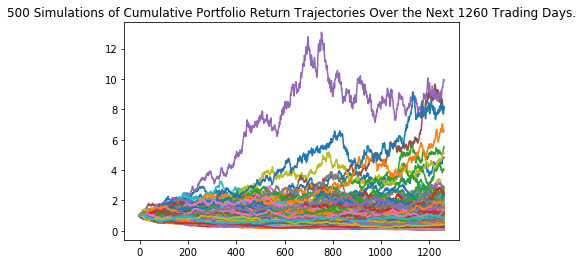

In [249]:
# Plot simulation outcomes
post_stock_line_plot = post_stock_fiveyear.plot_simulation()

# Save the plot for future usage
post_stock_line_plot.get_figure().savefig("Stock_fiveyear_sim_plot.png", bbox_inches="tight")

In [250]:
# Compute summary statistics from the simulated daily returns
post_stock_simulated_returns_data = {
    "mean": list(post_stock_fiveyear.simulated_return.mean(axis=1)),
    "median": list(post_stock_fiveyear.simulated_return.median(axis=1)),
    "min": list(post_stock_fiveyear.simulated_return.min(axis=1)),
    "max": list(post_stock_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
post_stock_df_simulated_returns = pd.DataFrame(post_stock_simulated_returns_data)

# Display sample data
post_stock_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000193,0.999633,0.932022,1.067966
2,0.999003,1.000492,0.915471,1.096556
3,0.999219,0.999256,0.907343,1.117004
4,0.999413,0.999217,0.889186,1.120522


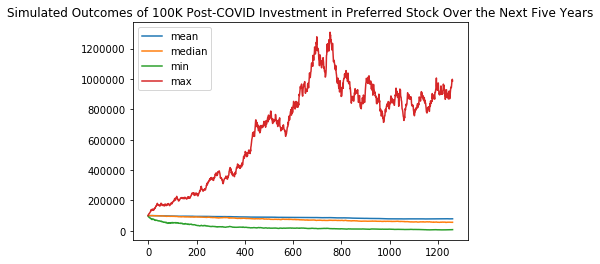

In [251]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
post_stock_cumulative_pnl = initial_investment * post_stock_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
post_stock_cumulative_pnl.plot(title="Simulated Outcomes of 100K Post-COVID Investment in Preferred Stock Over the Next Five Years")

In [252]:
# Fetch summary statistics from the Monte Carlo simulation results
post_stock_tbl = post_stock_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(post_stock_tbl)

count           500.000000
mean              0.792118
std               0.917245
min               0.079614
25%               0.337881
50%               0.565067
75%               0.928151
max               9.868362
95% CI Lower      0.137782
95% CI Upper      2.509664
Name: 1260, dtype: float64


In [253]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
post_stock_ci_lower = round(post_stock_tbl[8]*100000,2)
post_stock_ci_upper = round(post_stock_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an post-COVID initial investment of $100,000 in stocks"
      f" over the next 5 years will end within in the range of"
      f" ${post_stock_ci_lower} and ${post_stock_ci_upper}")

There is a 95% chance that an post-COVID initial investment of $100,000 in preferred stocks over the next 5 years will end within in the range of $13778.17 and $250966.36


### Pre-COVID S&P 500

In [255]:
# Get 5 year's worth of historical price data for S&P 500
pre_sp500_df_ticker = api1.get_barset(
    sp500_ticker,
    timeframe,
    start=pre_start_date,
    end=pre_end_date
).df

# Display sample data
pre_sp500_df_ticker.head()

SPY                                    
                             open    high      low   close     volume
2015-01-02 00:00:00-05:00  206.38  206.88  204.180  205.41   94506045
2015-01-05 00:00:00-05:00  204.17  204.37  201.350  201.80  133100354
2015-01-06 00:00:00-05:00  202.09  202.72  198.855  199.82  166955423
2015-01-07 00:00:00-05:00  201.42  202.72  200.880  202.34  103285826
2015-01-08 00:00:00-05:00  204.00  206.16  203.990  205.92  112316394

In [256]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
pre_sp500_fiveyear = MCSimulation(
    portfolio_data = pre_sp500_df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [257]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
pre_sp500_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.025054,0.999102,1.014093,1.002333,1.008084,0.999631,1.002361,0.998642,0.992420,1.018680,...,1.005502,1.013899,1.012745,0.999774,0.996121,1.010419,0.997234,0.999514,0.992778,0.991110
2,1.015087,1.009967,1.029274,1.005801,1.011607,0.998347,1.010715,1.012407,0.988746,1.021075,...,1.006748,1.009018,1.008619,1.012998,0.992705,1.008688,0.998431,1.009580,0.999254,0.977362
3,1.019731,1.019509,1.051335,0.993147,1.021589,1.005835,1.009751,1.009821,0.977042,1.020612,...,1.013306,0.995199,1.022346,1.010193,1.001370,1.024013,1.006867,1.013638,1.009769,0.984624
4,1.014822,1.021664,1.045800,0.993663,1.013249,1.006199,1.010951,1.009282,0.966953,1.027075,...,1.014160,0.998886,0.998488,1.004477,1.002139,1.035131,1.000091,1.014744,1.005501,0.995884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.549539,1.256999,1.442421,1.391570,1.223406,1.739780,0.946639,1.597642,1.560384,1.014972,...,1.389767,1.785710,1.023249,1.900562,1.619035,2.136914,1.695182,1.420357,1.057312,0.934157
1257,1.560691,1.245902,1.454175,1.392027,1.221440,1.727243,0.956150,1.577447,1.567076,1.016917,...,1.403542,1.786295,1.023680,1.866904,1.630236,2.164753,1.693401,1.429876,1.064476,0.936715
1258,1.564154,1.263489,1.458629,1.394671,1.210891,1.737855,0.954340,1.580173,1.553052,1.017378,...,1.389576,1.810958,1.018141,1.869428,1.629784,2.160009,1.688590,1.416074,1.062877,0.942949
1259,1.554385,1.254071,1.457960,1.406188,1.210102,1.756397,0.967849,1.561709,1.534343,1.022177,...,1.388370,1.825761,1.012104,1.891735,1.628459,2.184064,1.682136,1.417690,1.058447,0.950529


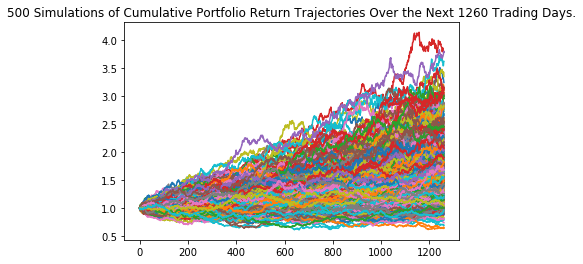

In [258]:
# Plot simulation outcomes
pre_sp500_line_plot = pre_sp500_fiveyear.plot_simulation()

# Save the plot for future usage
pre_sp500_line_plot.get_figure().savefig("SP500_fiveyear_sim_plot.png", bbox_inches="tight")

In [259]:
# Compute summary statistics from the simulated daily returns
pre_sp500_simulated_returns_data = {
    "mean": list(pre_sp500_fiveyear.simulated_return.mean(axis=1)),
    "median": list(pre_sp500_fiveyear.simulated_return.median(axis=1)),
    "min": list(pre_sp500_fiveyear.simulated_return.min(axis=1)),
    "max": list(pre_sp500_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
pre_sp500_df_simulated_returns = pd.DataFrame(pre_sp500_simulated_returns_data)

# Display sample data
pre_sp500_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000762,1.000040,0.974408,1.027738
2,1.000921,1.000392,0.954519,1.034311
3,1.001241,1.000897,0.947662,1.062543
4,1.002084,1.001227,0.945676,1.067667


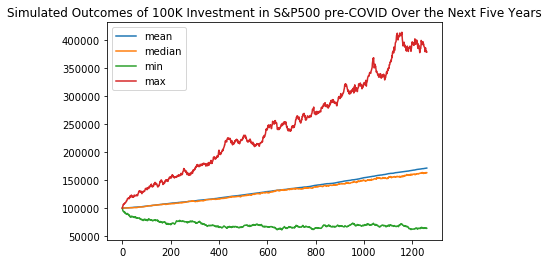

In [260]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
pre_sp500_cumulative_pnl = initial_investment * pre_sp500_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
pre_sp500_cumulative_pnl.plot(x = Number of Simulatitle="Simulated Outcomes of 100K Investment in S&P500 pre-COVID Over the Next Five Years")

In [261]:
# Fetch summary statistics from the Monte Carlo simulation results
pre_sp500_tbl = pre_sp500_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(pre_sp500_tbl)

count           500.000000
mean              1.714601
std               0.529933
min               0.642276
25%               1.333625
50%               1.633376
75%               2.003887
max               3.782560
95% CI Lower      0.906381
95% CI Upper      2.996606
Name: 1260, dtype: float64


In [262]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
pre_sp500_ci_lower = round(pre_sp500_tbl[8]*100000,2)
pre_sp500_ci_upper = round(pre_sp500_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an pre-COVID initial investment of $100,000 in S&P 500"
      f" over the next 5 years will end within in the range of"
      f" ${pre_sp500_ci_lower} and ${pre_sp500_ci_upper}")

There is a 95% chance that an pre-COVID initial investment of $100,000 in S&P 500 over the next 5 years will end within in the range of $90638.08 and $299660.57


### Post-COVID SP500

In [263]:
# Get 8 month's worth of historical price data for SP500
post_sp500_df_ticker = api1.get_barset(
    sp500_ticker,
    timeframe,
    start=post_start_date,
    end=post_end_date
).df

# Display sample data
post_sp500_df_ticker.head()

SPY                                         
                               open      high       low     close     volume
2020-02-18 00:00:00-05:00  336.5100  337.6677  335.2100  336.7000   45739289
2020-02-19 00:00:00-05:00  337.7900  339.0800  337.4800  338.3100   34121414
2020-02-20 00:00:00-05:00  337.7423  338.6400  333.6817  338.3379   63734196
2020-02-21 00:00:00-05:00  335.4600  335.7950  332.5800  333.4900   88418384
2020-02-24 00:00:00-05:00  323.1400  333.5623  321.2400  322.4100  127181403

In [264]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
post_sp500_fiveyear = MCSimulation(
    portfolio_data = post_sp500_df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [265]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
post_sp500_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001219,1.021798,0.982063,0.983450,1.013892,0.973675,0.992382,1.001951,1.036887,1.011628,...,0.989468,1.031686,1.005938,1.039162,0.985380,0.992267,0.990979,1.023355,0.966949,0.969517
2,0.977998,1.039700,0.969985,0.979846,0.987727,0.924721,0.957012,1.011854,1.003384,1.021757,...,0.984705,1.023673,0.980302,1.022480,0.977093,0.999046,1.021577,1.009133,0.924848,0.972266
3,0.937202,1.006319,0.980554,0.965655,0.980549,0.908384,0.987493,0.993668,0.972200,1.032563,...,0.991649,1.030312,0.974005,1.004302,1.006124,1.004560,0.976620,0.998621,0.904490,0.979575
4,0.930867,1.002184,1.028631,0.953227,1.005364,0.924344,0.964146,1.007396,0.970511,1.059221,...,0.984565,1.014899,0.997962,1.009190,1.000432,1.021084,0.952912,1.031868,0.877917,0.943185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.381337,1.371821,0.966112,0.263664,2.134218,0.368475,0.492281,0.426243,2.162114,7.392392,...,1.045865,1.458530,1.482629,1.256848,2.245725,0.442531,0.438984,0.330947,1.528609,1.011187
1257,0.389801,1.353621,0.972472,0.258476,2.106205,0.364146,0.479332,0.436443,2.098534,7.184581,...,1.065030,1.408416,1.432817,1.278094,2.285527,0.430120,0.449641,0.343874,1.512533,1.039499
1258,0.417859,1.301392,0.979549,0.254249,2.146598,0.356386,0.465270,0.431505,2.128912,7.057091,...,1.046660,1.386657,1.407906,1.245831,2.321418,0.422692,0.445747,0.354313,1.492993,1.081935
1259,0.398931,1.303441,0.983694,0.259459,2.229483,0.356920,0.476654,0.436153,2.200900,6.994208,...,1.012322,1.391410,1.411907,1.288371,2.209187,0.447969,0.429781,0.342822,1.476207,1.070719


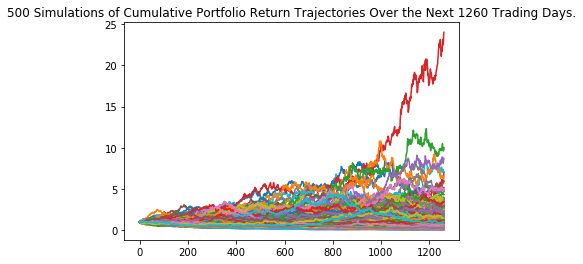

In [266]:
# Plot simulation outcomes
post_sp500_line_plot = post_sp500_fiveyear.plot_simulation()

# Save the plot for future usage
post_sp500_line_plot.get_figure().savefig("SP500_fiveyear_sim_plot.png", bbox_inches="tight")

In [267]:
# Compute summary statistics from the simulated daily returns
post_sp500_simulated_returns_data = {
    "mean": list(post_sp500_fiveyear.simulated_return.mean(axis=1)),
    "median": list(post_sp500_fiveyear.simulated_return.median(axis=1)),
    "min": list(post_sp500_fiveyear.simulated_return.min(axis=1)),
    "max": list(post_sp500_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
post_sp500_df_simulated_returns = pd.DataFrame(post_sp500_simulated_returns_data)

# Display sample data
post_sp500_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.998713,0.997945,0.927673,1.074652
2,0.996847,0.998708,0.890815,1.087096
3,0.995561,0.995259,0.854767,1.111042
4,0.999450,0.999591,0.866484,1.183628


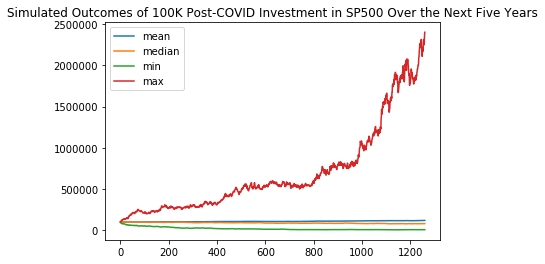

In [268]:
# Set initial investment
initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
post_sp500_cumulative_pnl = initial_investment * post_sp500_df_simulated_returns

# Use the 'plot' function to create a chart of the simulated profits/losses
post_sp500_cumulative_pnl.plot(title="Simulated Outcomes of 100K Post-COVID Investment in SP500 Over the Next Five Years")

In [269]:
# Fetch summary statistics from the Monte Carlo simulation results
post_sp500_tbl = post_sp500_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(post_sp500_tbl)

count           500.000000
mean              1.197546
std               1.554547
min               0.071639
25%               0.429363
50%               0.805182
75%               1.471335
max              24.020391
95% CI Lower      0.151517
95% CI Upper      4.163049
Name: 1260, dtype: float64


In [271]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
post_sp500_ci_lower = round(post_sp500_tbl[8]*100000,2)
post_sp500_ci_upper = round(post_sp500_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an post-COVID initial investment of $100,000 in S&P 500"
      f" over the next 5 years will end within in the range of"
      f" ${post_sp500_ci_lower} and ${post_sp500_ci_upper}")

There is a 95% chance that an post-COVID initial investment of $100,000 in S&P 500 over the next 5 years will end within in the range of $15151.74 and $416304.94
